In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json # please download kaggle.json and place it in files panel

In [2]:
! kaggle datasets download -d msambare/fer2013

 99% 60.0M/60.3M [00:00<00:00, 181MB/s]
100% 60.3M/60.3M [00:00<00:00, 178MB/s]


In [3]:
! unzip "/content/fer2013.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [4]:
import os
import shutil

In [5]:
shutil.rmtree('/content/train/disgust')
shutil.rmtree('/content/test/disgust')

In [6]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

In [7]:
num_classes = 6
img_rows,img_cols = 48,48
batch_size = 32

In [8]:
train_data_dir = '/content/train'
validation_data_dir = '/content/test'

In [9]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.5,
					zoom_range=0.5,
					width_shift_range=0.2,
					height_shift_range=0.2,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [11]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

In [17]:
def alexnet():
    model = Sequential([
                        
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(48,48,1), padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(1,1)),

    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(1,1)),
    
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(1,1)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')])

    return model

In [18]:
model2 = alexnet()
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_5 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 128)      512       
 hNormalization)                                                 
                                                      

In [19]:
lr_schedule = LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20))

#callbacks = [earlystop,checkpoint,lr_schedule]
callbacks = [lr_schedule]
model2.compile(loss='categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])

In [22]:
nb_train_samples = 28273 
nb_validation_samples = 7067
epochs=20

In [23]:
history2=model2.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


883/883 [==============================] - 227s 257ms/step - loss: 2.6813 - accuracy: 0.2522 - val_loss: 1.7656 - val_accuracy: 0.2504
Epoch 2/20
883/883 [==============================] - 226s 256ms/step - loss: 1.7741 - accuracy: 0.2552 - val_loss: 1.7972 - val_accuracy: 0.2494
Epoch 3/20
883/883 [==============================] - 226s 255ms/step - loss: 1.7801 - accuracy: 0.2549 - val_loss: 1.7927 - val_accuracy: 0.2504
Epoch 4/20
883/883 [==============================] - 226s 256ms/step - loss: 2.0145 - accuracy: 0.2549 - val_loss: 1.7610 - val_accuracy: 0.2507
Epoch 5/20
883/883 [==============================] - 225s 255ms/step - loss: 1.7580 - accuracy: 0.2552 - val_loss: 1.7601 - val_accuracy: 0.2516
Epoch 6/20
883/883 [==============================] - 225s 255ms/step - loss: 1.7662 - accuracy: 0.2551 - val_loss: 1.7607 - val_accuracy: 0.2507
Epoch 7/20
883/883 [==============================] - 225s 255ms/step - loss: 1.7579 - accuracy: 0.2553 - val_loss: 1.7607 - val_accura

In [24]:
import matplotlib.pyplot as plt

def plot_graphs(history):
    """
    Plot accuracy and loss graph
    Arguments:
        History: model history
    """

    # ACCURACY
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend(['accuracy', 'val_accuracy'])

    # Show figure
    plt.show()

    # LOSS
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend(['loss', 'val_loss'])

    # Show figure
    plt.show()

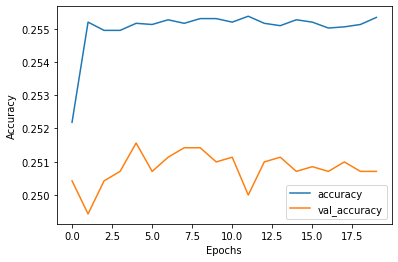

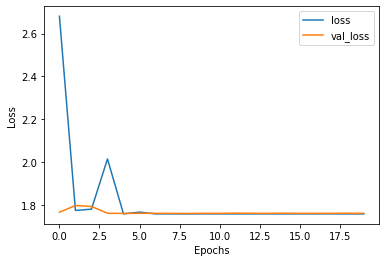

In [26]:
plot_graphs(history2)